In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# datasets – Contains preloaded datasets like MNIST, CIFAR-10, etc., which are commonly used for training and testing models.

# layers – Contains all the building blocks for neural networks (e.g., Dense, Conv2D, Flatten, Dropout).

# models – Allows you to define and manage entire neural networks, like Sequential or functional models.

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
# datasets.fashion_mnist.load_data()

# Downloads and loads the Fashion MNIST dataset (if not already present).

# This dataset contains 70,000 grayscale images (28x28 pixels) of fashion items (like shirts, shoes, bags).

# It's a drop-in replacement for MNIST (digit images) but more challenging.

# The function returns:

# X_train: 60,000 training images

# y_train: labels (0–9) for those 60,000 images

# X_test: 10,000 testing images

# y_test: labels for the test images

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step 


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
# Each pixel in the Fashion MNIST images has a value from 0 to 255 (grayscale intensity).

# Dividing by 255.0 scales all pixel values to the range [0, 1].

# For example, a pixel value of 128 becomes 128 / 255 ≈ 0.50.


In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
# This code reshapes the image data so it's ready for a Convolutional Neural Network (CNN).
# Each image in Fashion MNIST is:

# Originally shaped: (28, 28) → just height and width (grayscale image).

# But CNNs expect input as: (height, width, channels).

# 28 = height

# 28 = width

# 1 = number of color channels (1 for grayscale)

In [5]:
#Great! You've built a Convolutional Neural Network (CNN) for classifying Fashion MNIST images. Here's a clear explanation of each part of your model:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Conv2D layer with 32 filters of size 3×3
    # Applies convolution to extract features from the image
    # ReLU introduces non-linearity
    # input_shape=(28, 28, 1): input is 28×28 grayscale images
    layers.MaxPooling2D((2, 2)),
    # Downsamples the feature maps (reduces size by 2×)
    # Helps reduce computation and control overfitting
    layers.Conv2D(64, (3, 3), activation='relu'),
    #   Another convolutional layer with 64 filters
    #   Learns more complex patterns (from already processed features) 
    layers.MaxPooling2D((2, 2)),
    # Again reduces the spatial size (halves it again)
    layers.Flatten(),
    # Flattens the 2D feature maps into a 1D vector to pass into the dense layers
    layers.Dense(128, activation='relu'),
    # A fully connected (dense) layer with 128 neurons
    # Learns abstract features
    layers.Dense(10, activation='softmax')  # 10 output classes
    # Output layer with 10 neurons (for the 10 classes in Fashion MNIST)
    
    # Softmax gives probability for each class — highest one is the model’s prediction
])

C:\Users\HARSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Perfect — this line prepares your CNN model for training by specifying how it should learn and evaluate itself. Here's the explanation:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    # optimizer='adam'
    # Adam is an adaptive optimizer — it adjusts the learning rate automatically during training.
    # It's widely used because it usually performs well out of the box.

# metrics=['accuracy']
# Tells the model to display accuracy during training and testing — a good way to monitor performance.

In [7]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)
# The model will go through the entire training dataset 5 times.
# More epochs can lead to better learning, but risk overfitting if too many.

# 20% of the training data is kept aside as validation data.
# The model trains on 80% and evaluates on the remaining 20% after each epoch.

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.7688 - loss: 0.6543 - val_accuracy: 0.8645 - val_loss: 0.3691
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8814 - loss: 0.3270 - val_accuracy: 0.8871 - val_loss: 0.3095
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8979 - loss: 0.2780 - val_accuracy: 0.8949 - val_loss: 0.2885
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9120 - loss: 0.2379 - val_accuracy: 0.8986 - val_loss: 0.2741
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9223 - loss: 0.2062 - val_accuracy: 0.9059 - val_loss: 0.2663


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
# The model correctly classified about 90.97% of the test images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8952 - loss: 0.2886

Test Accuracy: 0.8984


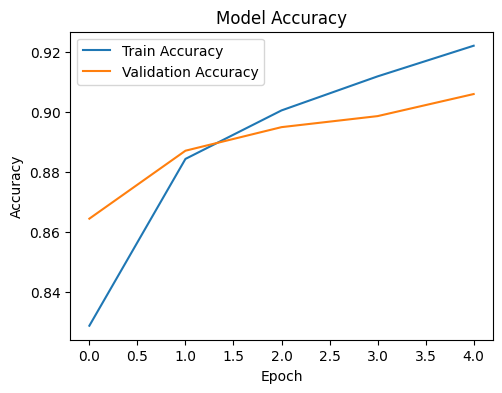

In [9]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


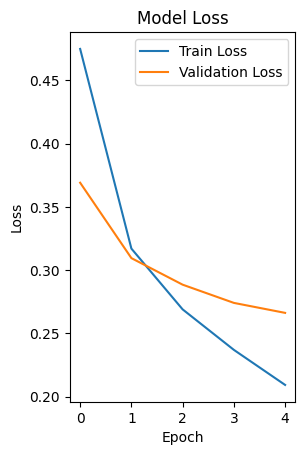

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()